# COM6018 - Assignment 1

Student Username: `liq23wr`

## Analysing Carbon Emissions Data

Before attempting the assignment make sure that you have read the accompanying assignment notes document carefully. This explains important details about what is expected and how you will be assessed.

## Loading the data

The data is being read from the file `owid-co2-data.csv` which you must download and store in the same directory as this notebook. Please leave the cell below unchanged. 

In [41]:
import pandas as pd

df = pd.read_csv('owid-co2-data.csv')

Add any further imports that your notebook needs in the cell below. If you are not using any then simply leave the cell blank. Remember, you are only allowed to use modules from the standard Python library, plus pandas, numpy, matplotlib and seaborn.

In [42]:
# SOLUTION
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Add any further imports that your notebook needs in this cell.

## Q1. The growth of CO<sub>2</sub> emissions

*How have CO<sub>2</sub> emissions grown over time?*

Consider the six continents: Africa, Asia, Europe, North America, Oceania and South America. Make a figure to show: i) how the total annual CO<sub>2</sub> emissions of each continent varied over the years 1950 to 2021. ii) How has the per capita CO<sub>2</sub> emissions (i.e., the emissions per person) of these continents varied over the same period.

Comment on how the contribution of each continent is different when measured in terms of total emissions and per capita emissions.

(Add your solution in the cells provided below.)

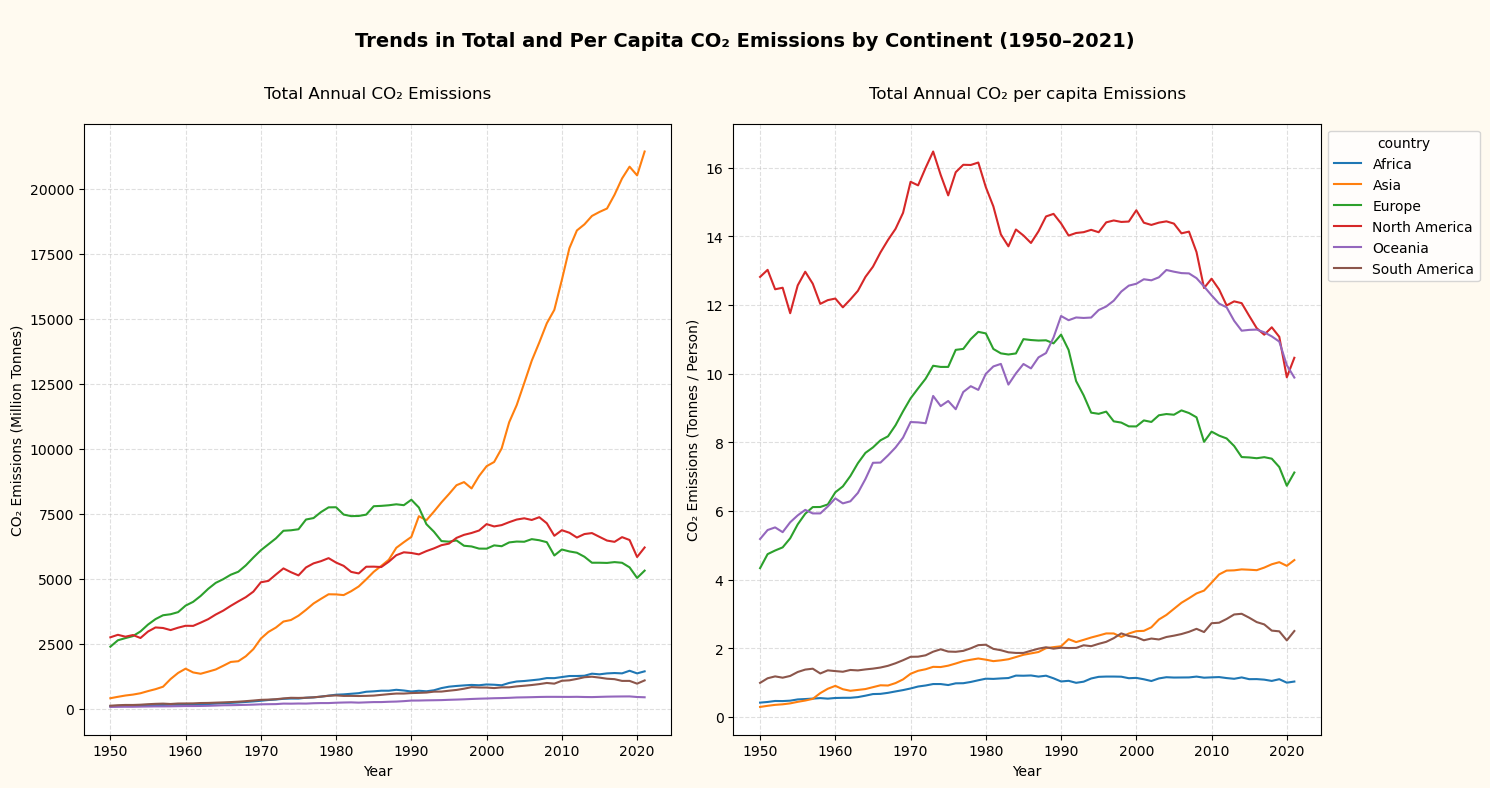

In [43]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.

# Configure the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
fig.set_facecolor('floralwhite')

# Define continents
continents = ['Asia', 'Africa', 'Europe', 'North America', 'Oceania', 'South America']
# Filter the data
query1 = df[(df['country'].isin(continents)) & (df['year'].between(1950, 2021))]


# i) how the total annual CO2 emissions of each continent varied over the years 1950 to 2021.
plot1 = sns.lineplot(query1, x='year', y='co2', hue='country', ax=axes[0], legend=False)
axes[0].set_title('Total Annual CO₂ Emissions\n')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('CO₂ Emissions (Million Tonnes)')
ticks = np.arange(0, 22000, 2500)
axes[0].set_yticks(ticks, minor=False)
axes[0].grid(which='both', linestyle='--', alpha=0.4)

# ii) How has the per capita CO2 emissions (i.e., the emissions per person) of these continents varied over the same period.
plot2 = sns.lineplot(query1, x='year', y='co2_per_capita', hue='country', ax=axes[1])
axes[1].set_title('Total Annual CO₂ per capita Emissions\n')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('CO₂ Emissions (Tonnes / Person)')
axes[1].grid(which='both', linestyle='--', alpha=0.4)

# Move the legend to top corner
sns.move_legend(plot2, "upper left", bbox_to_anchor=(1, 1))
# Set the main title
fig.suptitle('\nTrends in Total and Per Capita CO₂ Emissions by Continent (1950–2021)\n',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# ADD YOUR ANSWER TO THE QUESTION HERE

The 2021 CO<sub>2</sub> emissions data shows that Asia had the highest total emissions. However, when viewed on a per capita basis, Asia ranked fourth.

In contrast, while Oceania had the lowest total CO<sub>2</sub> emissions, its emissions per capita were among the highest globally.

This indicates that population size significantly impacts total CO<sub>2</sub> emissions.

## Q2. The share of CO2 emissions by country over time.

*Which countries have the highest CO<sub>2</sub> emissions?*

Consider the five countries with the highest total CO<sub>2</sub> emissions in 2020. Make separate plots for the years 1960, 1990 and 2020 that show the share of the total world emissions that each of these countries contributed in these years.

Consider the five European countries with the highest total CO<sub>2</sub> emissions in 2020. Make separate plots for the years 1960, 1990 and 2020 that show the share of the total European emissions that each of these countries contributed in these years.

Do the highest global producers produce a larger or smaller proportion of the total worlds emissions in 2020 compared to 1960? Do the highest European producers produce a larger or smaller proportion of the total European emissions in 2020 compared to 1960?

(Add your solution in the cells provided below.)

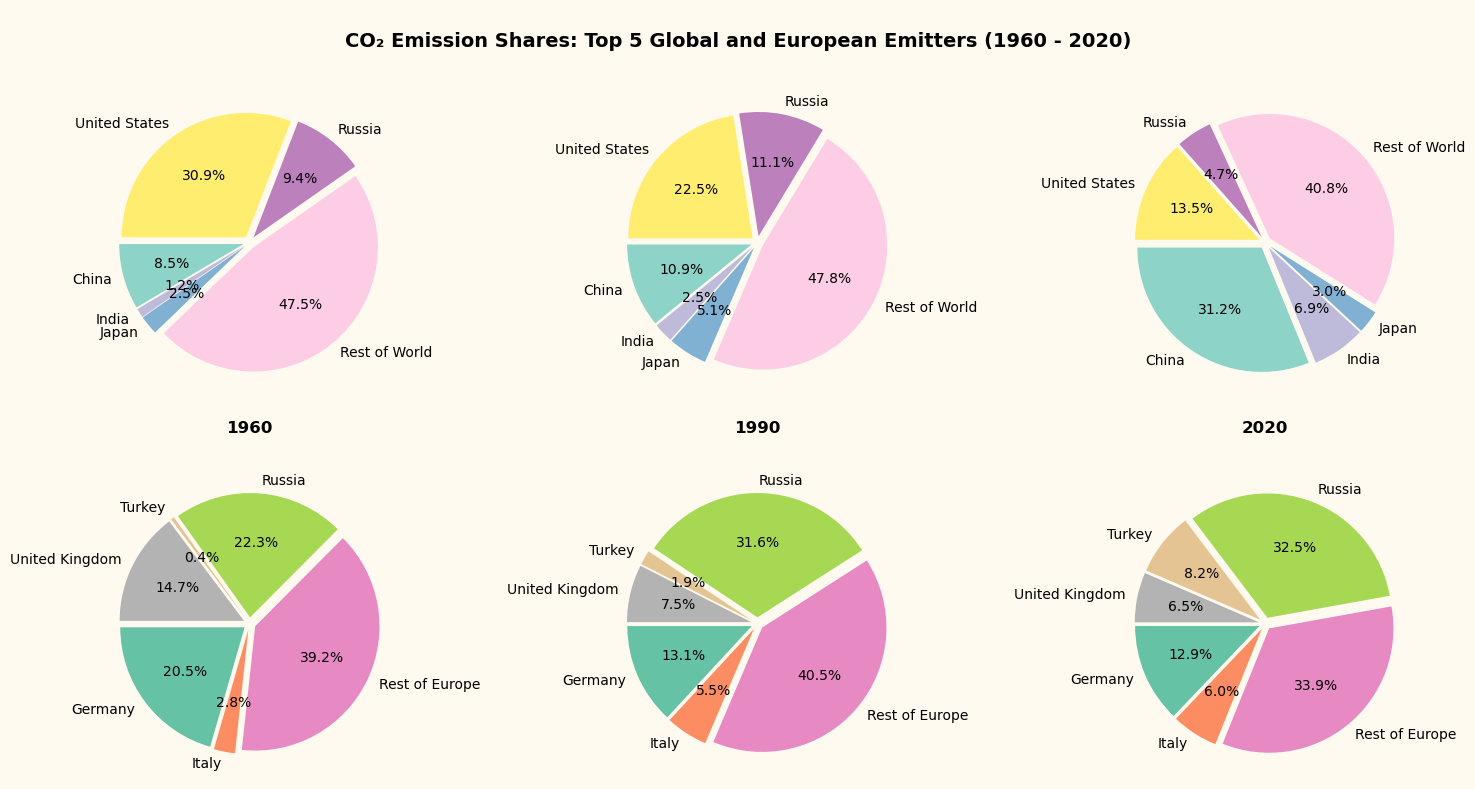

In [44]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.

# Configure the plot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
fig.set_facecolor('floralwhite')

# Define European Countries List
europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom','Vatican City']
# Define Interested Years
interested_years = [1960, 1990, 2020]
# Filter Top 5 CO2 emissions countries in 2020
top5_world_countries = df[(df['year'] == 2020) & (~df['iso_code'].isnull())].nlargest(5, 'co2').country
top5_european_countries = df[(df['year'] == 2020) & (~df['iso_code'].isnull()) & (df['country'].isin(europe))].nlargest(5, 'co2').country

# Function that prepare DataFrame for plotting
def prepare_df(df, top5, other, interested_years, i):
    # Create a DataFrame that store the top 5 countries including Other
    df = df[((df['country'].isin(top5)) | (df['country'] == other)) & (df['year'] == interested_years[i])][['country', 'co2']]
    # Subtract Top 5 countries' CO2 emissions from Other
    df.loc[df.country == other, 'co2'] = df[df.country == other]['co2'] - df[df.country.isin(top5)]['co2'].sum()
    # Rename other to Rest of {Other}
    df['country'] = df['country'].replace(other, f'Rest of {other}')
    return df.groupby('country').sum()

for i in range(len(interested_years)):
    # Create a DataFrame for World data
    world_df = prepare_df(df=df, top5=top5_world_countries, other='World', interested_years=interested_years, i=i)
    # Plot the Global Emitter's data   
    world_df.plot(
        kind="pie",
        y="co2",
        ax=axes[i],
        autopct="%.1f%%",
        legend=False,
        explode=[0.05] * 6,
        ylabel="",
        colormap="Set3",
        startangle=180,
    )
    
    # Set X Label as Year
    axes[i].set_xlabel(f'\n{interested_years[i]}\n', fontsize=12, fontweight='bold')
    
    # Create a DataFrame for Europe data
    european_df = prepare_df(df=df, top5=top5_european_countries, other='Europe', interested_years=interested_years, i=i)
    # Plot the European Emitter's data   
    european_df.plot(
        kind="pie",
        y="co2",
        ax=axes[i + 3],
        autopct="%.1f%%",
        legend=False,
        explode=[0.05] * 6,
        ylabel="",
        colormap="Set2",
        startangle=180,
    )
    
# Set the main title
fig.suptitle('\nCO₂ Emission Shares: Top 5 Global and European Emitters (1960 - 2020)\n',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE

Since 1960, the top global producers have **increased** their share of total CO₂ emissions from 52.5% to almost 60% in 2020. 

Similarly, in Europe, the leading producers **grew** their share from 60.8% in 1960 to 66.1% in 2020. 

This shows that the highest emitters have become more dominant both globally and within Europe over the past six decades.

## Q3. The link between GDP and CO<sub>2</sub> emissions

*Do countries with high GDP always have high per capita CO<sub>2</sub> emissions.* 

Plot the per capita CO<sub>2</sub> emissions against the GDP per capita for each country, adjusting the area of each marker to represent the population of the country. Only include countries with a population of at leat 10 million people in 2018. Annotate significant countries on the plot, such as large countries or outliers.

Compare these plots for the year 1978, 1998 and 2018. Comment on any patterns in the relationship between GDP per capita and CO₂ emissions per capita and how they may have changed over time.

(Add your solution in the cells provided below.)

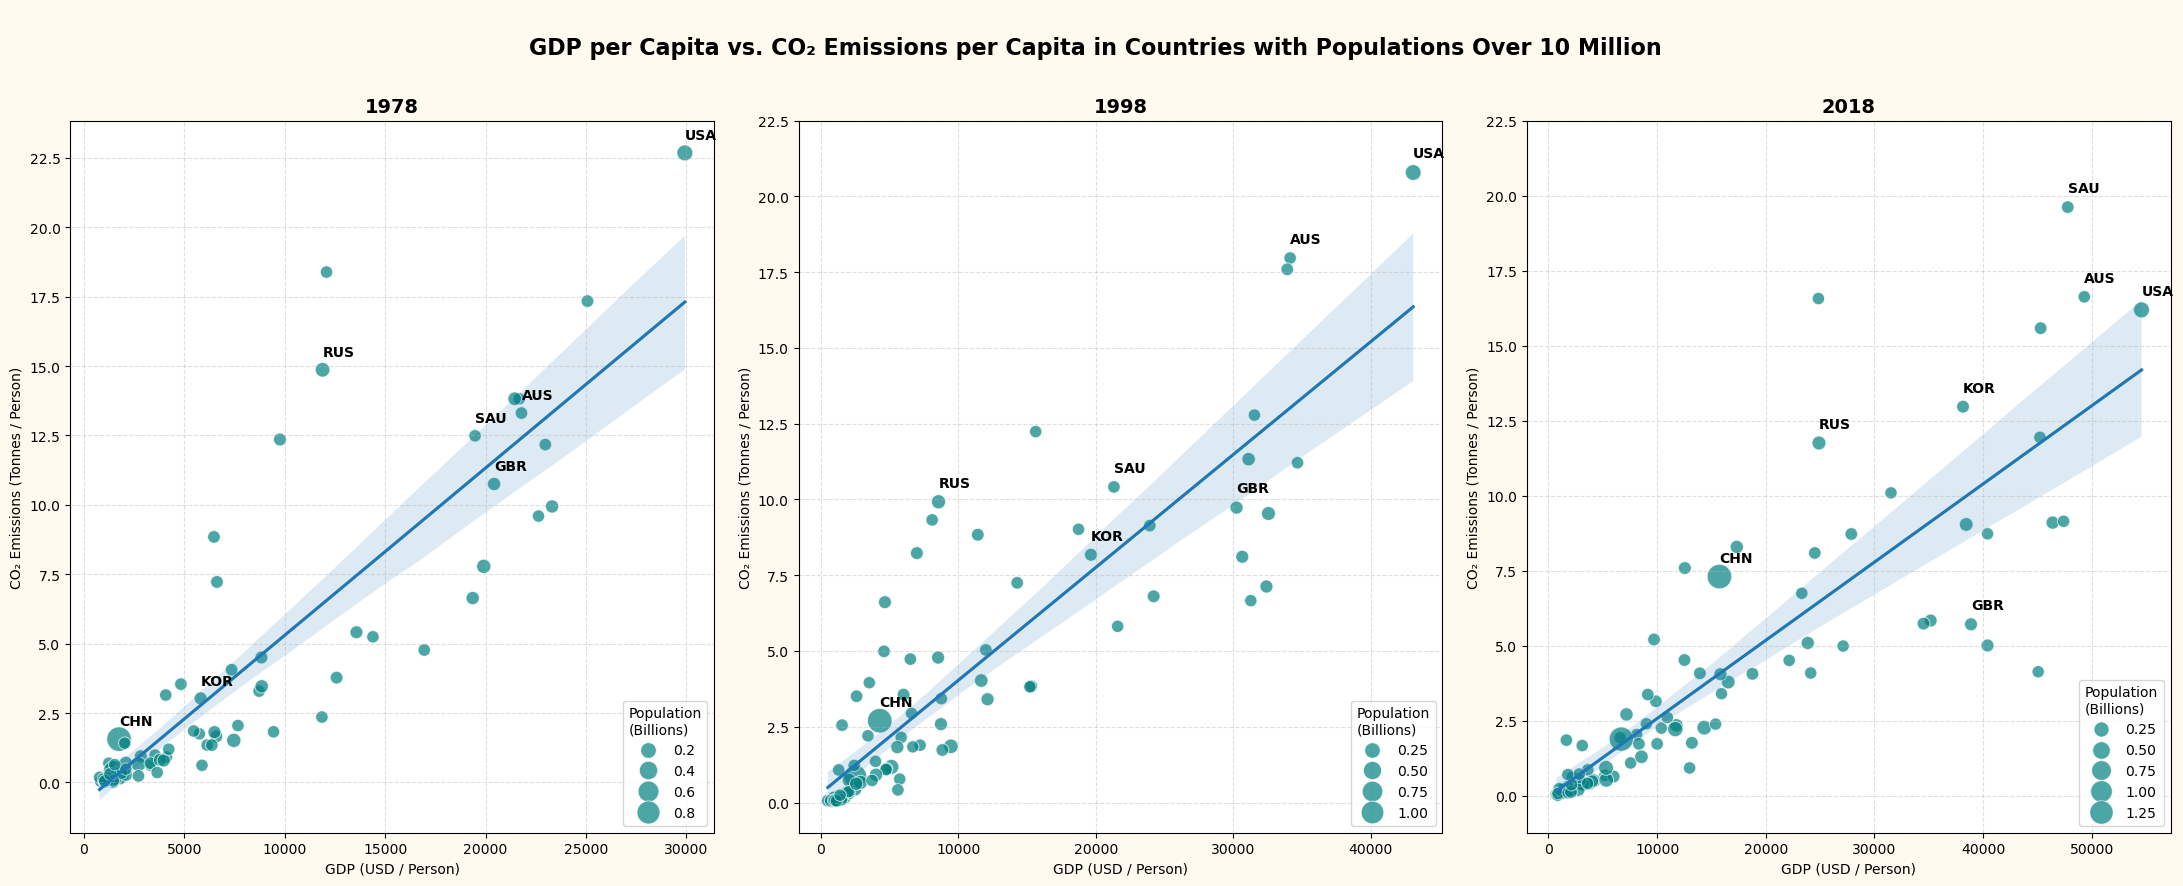

In [49]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.

# Configure the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 9))
fig.set_facecolor('floralwhite')

# Create the GDP per capita column
df['gdp_per_capita'] = df['gdp'] / df['population']
# Countries with at least 10 million people in 2018
query3 = df[(df['year'] == 2018) & (df['population'] >= 1e7) & (~df['iso_code'].isnull())]
# Define significants countries (SAU is the outlier, the rest is the large economic countries)
significant_countries = ['SAU', 'USA', 'CHN', 'RUS', 'AUS', 'GBR', 'KOR']
# Define Interested Years
interested_years = [1978, 1998, 2018]
# Define the default size of the scatterplot
plt.rcParams['lines.markersize'] = 12.5

for i in range(len(interested_years)):
    # Filter the data
    data = df[(df['country'].isin(query3['country'])) & (df['year'] == interested_years[i])]
    # Scatter Plot
    sns.scatterplot(data=data, 
                    x='gdp_per_capita', 
                    y='co2_per_capita',
                    color='teal',
                    size=data['population'] / 1e9, # Configure the size varying with population
                    ax=axes[i],
                    alpha=0.7
                    )
    # Add Trend Line
    sns.regplot(data=data,
                x='gdp_per_capita',
                y='co2_per_capita',
                scatter=False,
                ax=axes[i]
                )
    
    # Annotate significant countries
    for country in significant_countries:
        axes[i].annotate(
            country,
            # Specify Annotations' Position X as gdp_per_capita and Y as co2_per_capita with 0.5 offset
            xy=(float(data[data['iso_code'] == country]['gdp_per_capita'].iloc[0]) + 0.5, float(data[data['iso_code'] == country]['co2_per_capita'].iloc[0]) + 0.5),
            fontweight='bold'
            )
    
    # Configure Grids
    ticks = np.arange(0, 25, 2.5)
    axes[i].set_yticks(ticks, minor=False)
    axes[i].grid(which='both', linestyle='--', alpha=0.4)
    # Configure legend's position
    axes[i].legend(title='Population\n(Billions)',loc='lower right')
    # Set sub-title of each subplot
    axes[i].set_title(interested_years[i], fontweight='bold', fontsize=14)
    # Rename Labels
    axes[i].set_ylabel('CO₂ Emissions (Tonnes / Person)')
    axes[i].set_xlabel('GDP (USD / Person)')

# Add a main title for the entire figure
fig.suptitle('\nGDP per Capita vs. CO₂ Emissions per Capita in Countries with Populations Over 10 Million\n', fontweight='bold', fontsize=16)
# Display the plots with tight layout
fig.tight_layout()
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE

Overall, the plots show that the slope of the trend line between GDP per capita and CO₂ emissions per capita has decreased over time. This indicates that many countries are emitting less CO₂ per capita relative to their economic growth,

However, some Asian countries, notably China, South Korea and Saudi Arabia, have increased their CO₂ emissions proportionally with their GDP growth, indicating that in these nations, economic growth remains closely linked to higher CO₂ emissions.

## Q4. The development of wealth inequality over time.

*How has wealth and wealth inequality developed over time?*

Make a plot that shows the distribution of GDP per capita across countries at each decade from 1950 to 2020 (i.e., at the years 1950, 1960, 1970, etc.). Only include countries with a population of at least 5 million in 2020.

The World Bank defines an income of less than $2.15 per day as extreme poverty, corresponding to an annual GDP per capita of $785. Mark this threshold on your plots. For each year shown, calculate the number of people living in countries with a GDP per capita below this level and annotate this in your figure. Comment on whether this population has grown or shrunk as a proportion of the world’s total population over time.

(Add your solution in the cells provided below.)

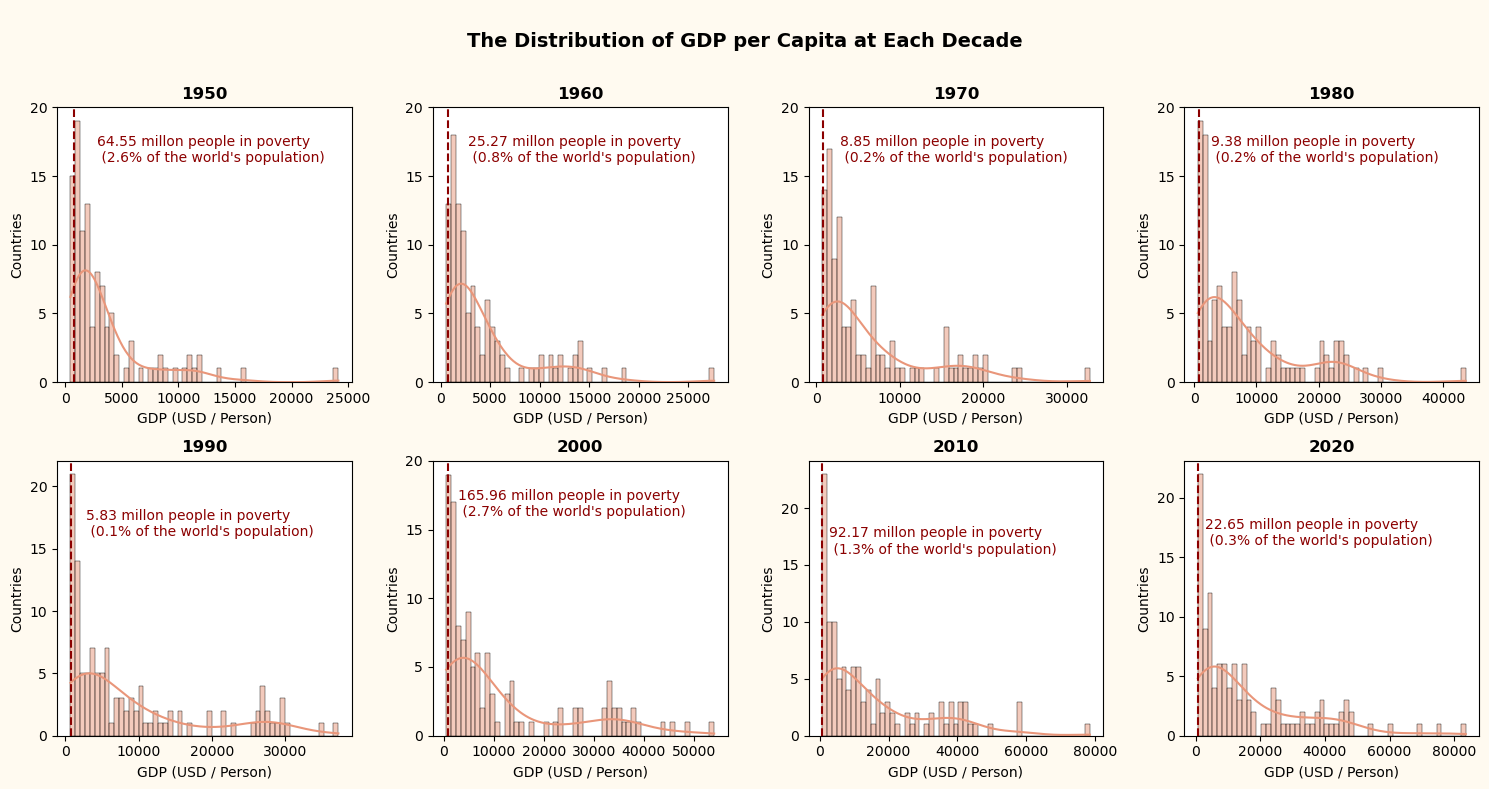

In [46]:
# ADD YOUR CODE HERE. THE CODE SHOULD PRODUCE A SINGLE FIGURE.

# Configure the plot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()
fig.set_facecolor('floralwhite')

# Countries with at least 5 million people in 2020
query4 = df[(df['year'] == 2020) & (df['population'] >= 5 * 1e6) & (~df['iso_code'].isnull())]
# Define Interested Years
interested_years = list(range(1950, 2021, 10))
# Define World Bank's threshold
threshold = 785
# Filter the data
data = df[df['country'].isin(query4['country'])].copy()
# Create the GDP per capita column
data['gdp_per_capita'] = data['gdp'] / data['population']

# Function to calculate the number of people living in poverty and their world proportion
def calculate_poverty_proportion(data, year, threshold):
    poverty_people = round(data[(data['year'] == year) & (data['gdp_per_capita'] < threshold)]['population'].sum() / 1e6, 2)
    world_population = float(df[(df['country'] == 'World') & (df['year'] == year)]['population'].iloc[0] / 1e6)
    proportion = round(poverty_people / world_population, 3)
    
    return poverty_people, proportion

for i in range(len(interested_years)):
    # Distribution plot
    sns.histplot(data=data[data['year'] == interested_years[i]], 
                 x='gdp_per_capita', 
                 bins=55,
                 color='darksalmon',
                 kde=True,
                 ax=axes[i])

    # Annotations
    poverty_people, proportion = calculate_poverty_proportion(data, interested_years[i], threshold)
    axes[i].axvline(threshold,color='darkred', linestyle='--')
    axes[i].annotate(xy=(threshold + 2000, 16), 
                     text=f'{poverty_people} millon people in poverty\n ({proportion * 100}% of the world\'s population)', 
                     color="darkred", 
                     fontsize=10)
    
    # Configure Ticks
    ticks = np.arange(0, 25, 5)
    axes[i].set_yticks(ticks, minor=False)
    # Set sub-title of each subplot
    axes[i].set_title(interested_years[i], fontweight='bold')
    # Rename Labels
    axes[i].set_ylabel('Countries')
    axes[i].set_xlabel('GDP (USD / Person)')

# Add a main title for the entire figure
fig.suptitle('\nThe Distribution of GDP per Capita at Each Decade\n', fontweight='bold', fontsize=14)
# Display the plots with tight layout
fig.tight_layout()
plt.show()

# ADD YOUR ANSWER TO THE QUESTION HERE

Overall, the population of people living in poverty has declined over time. 

However, it might fluctuate due to economic crises such as the Asian Financial Crisis in 1997 and the Great Recession in 2008, which could cause a rise in poverty in 2000 and 2010.

## Before submitting

If you have used print statements for debugging purposes, please make sure that you remove them before submitting your notebook. When the submitted notebook runs it should only generate the plots and no additional output.

Double check that your notebook runs correctly when cells are run in order from the beginning. You can do this by selecting "Restart and run all" from the Kernel menu. 

Make sure that you save your notebook using the name `COM6018-assignment1-<your-student-username>.ipynb`. For example, if your username is 'ac1jpb' then your notebook should be named `COM6018-assignment1-ac1jpb.ipynb`. 

To submit, follow the instruction in the accompanying assignment instructions document. For late submission, unless there are extenuating circumstances, standard lateness penalties will be applied.